In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [20]:
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','Outcome']
df = pd.read_csv('pima-indians-diabetes.csv',skiprows=9,header=None,names=col_names)

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [22]:
#Checking for missing values
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [23]:
#Splitting of dataset
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [24]:
features_names = list(X.columns)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(614, 7) (154, 7)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
t = tree.DecisionTreeClassifier(random_state=42)
t.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = t.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7402597402597403


In [29]:
from sklearn.metrics import classification_report, confusion_matrix


In [30]:
print(classification_report(y_test,y_pred,target_names=['No Diabetes (0)','Diabetes (1)']))

                 precision    recall  f1-score   support

No Diabetes (0)       0.82      0.76      0.79        99
   Diabetes (1)       0.62      0.71      0.66        55

       accuracy                           0.74       154
      macro avg       0.72      0.73      0.73       154
   weighted avg       0.75      0.74      0.74       154



In [31]:
print(confusion_matrix(y_test,y_pred))

[[75 24]
 [16 39]]


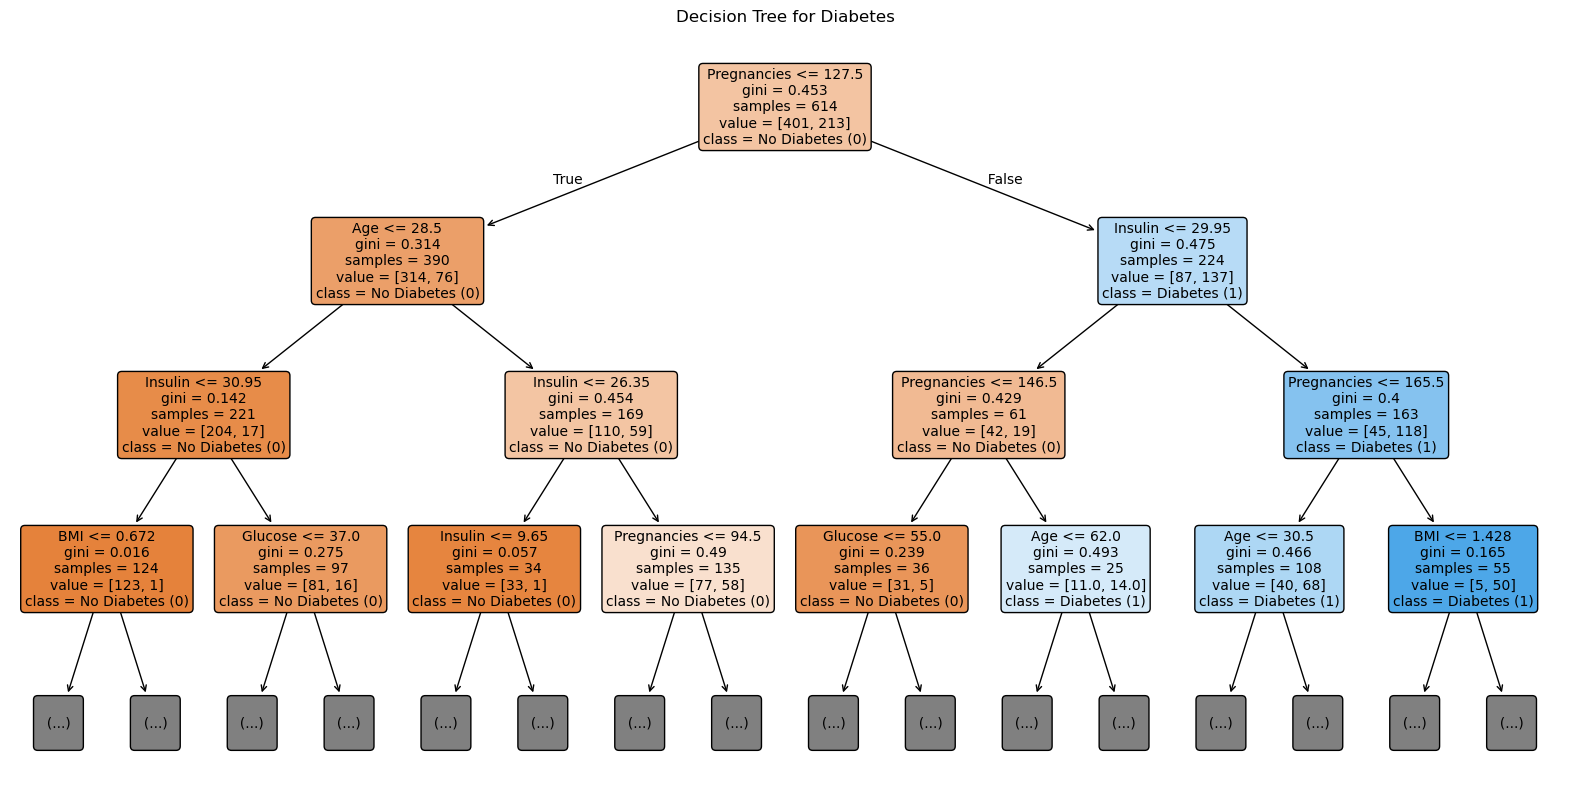

In [32]:
#Plot Tree
plt.figure(figsize=(20,10))
plot_tree(t,filled=True,rounded=True,class_names=['No Diabetes (0)','Diabetes (1)'],feature_names=features_names,max_depth=3,fontsize=10)
plt.title("Decision Tree for Diabetes")
plt.savefig("decision_tree_2.png")

In [34]:
import pandas as pd
import warnings

# Suppress a specific UserWarning from scikit-learn about feature names
# This is optional but cleans up the output
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# This assumes 'clf' (your trained model) and 'feature_names' 
# (the list of column names) already exist in memory from previous cells.

try:
    # --- 1. Get User Input ---
    print("--- Enter Patient Details for Diabetes Prediction ---")
    
    # Get numerical inputs
    preg_in = int(input("Pregnancies (e.g., 6): "))
    gluc_in = float(input("Glucose (e.g., 148): "))
    bp_in = float(input("Blood Pressure (e.g., 72): "))
    skin_in = float(input("Skin Thickness (e.g., 35): "))
    insulin_in = float(input("Insulin (e.g., 0): "))
    bmi_in = float(input("BMI (e.g., 33.6): "))
    pedigree_in = float(input("Diabetes Pedigree Function (e.g., 0.627): "))
    age_in = int(input("Age (e.g., 50): "))

    # --- 2. Process the Input ---
    
    # Create a dictionary to hold the processed data
    # The keys MUST match the feature_names
    input_data = {
        'Pregnancies': preg_in,
        'Glucose': gluc_in,
        'BloodPressure': bp_in,
        'SkinThickness': skin_in,
        'Insulin': insulin_in,
        'BMI': bmi_in,
        'DiabetesPedigree': pedigree_in,
        'Age': age_in
    }

    # --- 3. Create DataFrame for Prediction ---
    
    # Convert the dictionary to a single-row DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Ensure the columns are in the *exact* same order as the training data
    # 'feature_names' should be from Cell 4
    input_df = input_df[features_names] 

    # --- 4. Make Prediction ---
    
    # Get the prediction (will be [0] or [1])
    prediction = t.predict(input_df)
    
    # Get the probability (confidence) of the prediction
    prediction_proba = t.predict_proba(input_df)

    # --- 5. Show the Result ---
    
    print("\n--- Processing Complete ---")
    
    if prediction[0] == 1:
        eligibility = "Diabetes"
        confidence = prediction_proba[0][1] # Probability of class 1
    else:
        eligibility = "No Diabetes"
        confidence = prediction_proba[0][0] # Probability of class 0

    print(f"\nPrediction: {eligibility}")
    print(f"Confidence: {confidence*100:.2f}%")

except ValueError:
    print("\nError: Invalid input. Please make sure you enter numbers for all fields.")
except NameError:
    print("\nError: Model 'clf' or 'feature_names' not found.")
    print("Please make sure you have run the training cells (1-6) first.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

--- Enter Patient Details for Diabetes Prediction ---


Pregnancies (e.g., 6):  0
Glucose (e.g., 148):  120
Blood Pressure (e.g., 72):  72
Skin Thickness (e.g., 35):  35
Insulin (e.g., 0):  0
BMI (e.g., 33.6):  33.6
Diabetes Pedigree Function (e.g., 0.627):  0.627
Age (e.g., 50):  20



--- Processing Complete ---

Prediction: No Diabetes
Confidence: 100.00%
